<a href="https://colab.research.google.com/github/shailshree23/ML_Lab/blob/main/Linear_Ridge_and_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset A — Linear OLS
theta (intercept, slope): [1.9000000000000057, 0.7]
Predicted values (per point): [2.6, 3.3, 4.0, 4.7, 5.4]
MSE: 1.020000



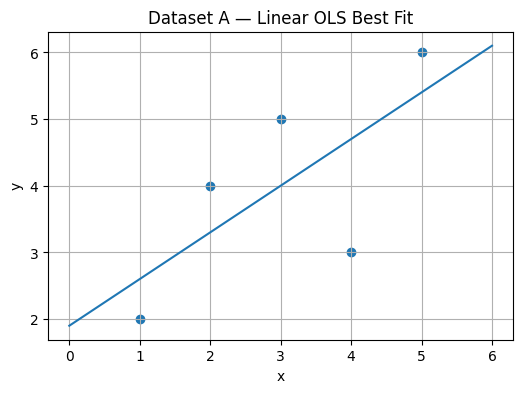

Dataset B — Linear OLS
theta (intercept, slope): [2.100000000000006, 1.350000000000001]
Predicted values (per point): [4.8, 7.5, 10.2, 12.9, 15.6]
MSE: 0.380000



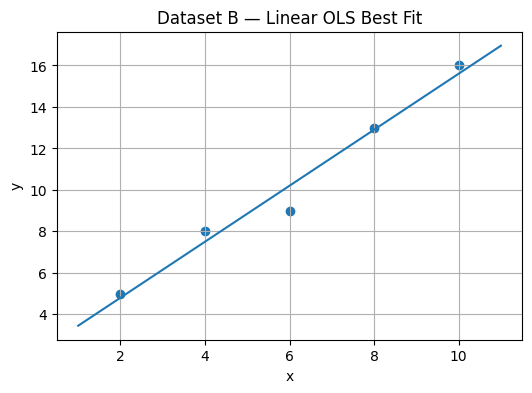

Dataset C — Linear OLS
theta (intercept, slope): [4.900000000000012, 0.7000000000000005]
Predicted values (per point): [7.0, 8.4, 9.8, 11.2, 12.6]
MSE: 0.640000



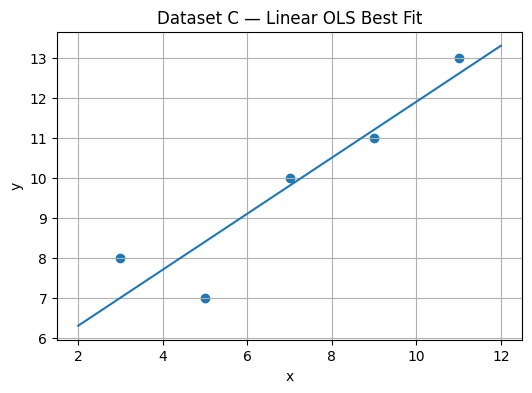

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

datasets = {
    "A": {"x": np.array([1,2,3,4,5], dtype=float), "y": np.array([2,4,5,3,6], dtype=float)},
    "B": {"x": np.array([2,4,6,8,10], dtype=float), "y": np.array([5,8,9,13,16], dtype=float)},
    "C": {"x": np.array([3,5,7,9,11], dtype=float), "y": np.array([8,7,10,11,13], dtype=float)}
}

def add_intercept(x):
    return np.hstack([np.ones((x.shape[0],1)), x.reshape(-1,1)])

for name, data in datasets.items():
    x = data["x"].reshape(-1,1)
    y = data["y"].reshape(-1,1)
    X = add_intercept(x)

    # Normal equation (OLS)
    XtX = X.T.dot(X)
    XtX_inv = np.linalg.inv(XtX)
    XtY = X.T.dot(y)
    theta = XtX_inv.dot(XtY)          # [intercept, slope]

    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)

    print("="*60)
    print(f"Dataset {name} — Linear OLS")
    print(f"theta (intercept, slope): {theta.flatten().tolist()}")
    print(f"Predicted values (per point): {np.round(y_pred.flatten(),6).tolist()}")
    print(f"MSE: {mse:.6f}")
    print("="*60, "\n")

    # Best-fit plot (scatter + fitted line)
    plt.figure(figsize=(6,4))
    plt.scatter(x.flatten(), y.flatten())
    # create smooth x-range for plotting fitted line
    x_line = np.linspace(x.min()-1, x.max()+1, 200).reshape(-1,1)
    X_line = add_intercept(x_line)
    y_line = X_line.dot(theta)
    plt.plot(x_line.flatten(), y_line.flatten())
    plt.title(f"Dataset {name} — Linear OLS Best Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Dataset A — Ridge (alpha=1.0)
theta (intercept, coef): [2.0909090909090935, 0.6363636363636362]
Predicted values (per point): [2.727273, 3.363636, 4.0, 4.636364, 5.272727]
MSE: 1.028099



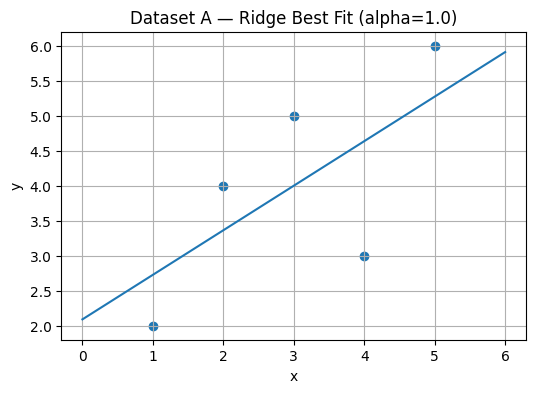

Dataset B — Ridge (alpha=1.0)
theta (intercept, coef): [2.2975609756097564, 1.3170731707317074]
Predicted values (per point): [4.931707, 7.565854, 10.2, 12.834146, 15.468293]
MSE: 0.388673



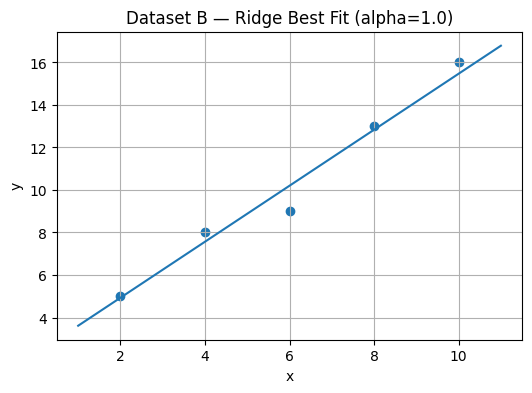

Dataset C — Ridge (alpha=1.0)
theta (intercept, coef): [5.019512195121954, 0.6829268292682922]
Predicted values (per point): [7.068293, 8.434146, 9.8, 11.165854, 12.531707]
MSE: 0.642332



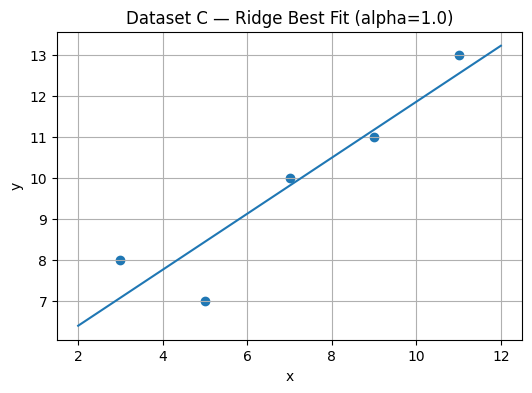

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

datasets = {
    "A": {"x": np.array([1,2,3,4,5], dtype=float), "y": np.array([2,4,5,3,6], dtype=float)},
    "B": {"x": np.array([2,4,6,8,10], dtype=float), "y": np.array([5,8,9,13,16], dtype=float)},
    "C": {"x": np.array([3,5,7,9,11], dtype=float), "y": np.array([8,7,10,11,13], dtype=float)}
}

def add_intercept(x):
    return np.hstack([np.ones((x.shape[0],1)), x.reshape(-1,1)])

def ridge_closed_form(X, y, alpha):
    n_features = X.shape[1]
    R = np.zeros((n_features, n_features))
    R[1:, 1:] = np.eye(n_features - 1)     # regularize coefficients only
    A = X.T.dot(X) + alpha * R
    theta = np.linalg.inv(A).dot(X.T).dot(y)
    return theta

# Choose the regularization strength here (change for experiments)
alpha = 1.0

for name, data in datasets.items():
    x = data["x"].reshape(-1,1)
    y = data["y"].reshape(-1,1)
    X = add_intercept(x)

    theta = ridge_closed_form(X, y, alpha)
    y_pred = X.dot(theta)
    mse = mean_squared_error(y, y_pred)

    print("="*60)
    print(f"Dataset {name} — Ridge (alpha={alpha})")
    print(f"theta (intercept, coef): {theta.flatten().tolist()}")
    print(f"Predicted values (per point): {np.round(y_pred.flatten(),6).tolist()}")
    print(f"MSE: {mse:.6f}")
    print("="*60, "\n")

    # Plot best-fit
    plt.figure(figsize=(6,4))
    plt.scatter(x.flatten(), y.flatten())
    x_line = np.linspace(x.min()-1, x.max()+1, 200).reshape(-1,1)
    X_line = add_intercept(x_line)
    y_line = X_line.dot(theta)
    plt.plot(x_line.flatten(), y_line.flatten())
    plt.title(f"Dataset {name} — Ridge Best Fit (alpha={alpha})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

Dataset A — Lasso (alpha=0.1)
Intercept: 2.050000
Coefficient: [0.65]
Predicted values (per point): [2.7, 3.35, 4.0, 4.65, 5.3]
MSE: 1.025000



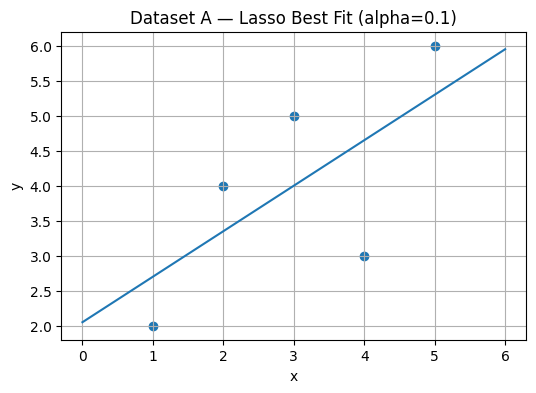

Dataset B — Lasso (alpha=0.1)
Intercept: 2.175000
Coefficient: [1.3375]
Predicted values (per point): [4.85, 7.525, 10.2, 12.875, 15.55]
MSE: 0.381250



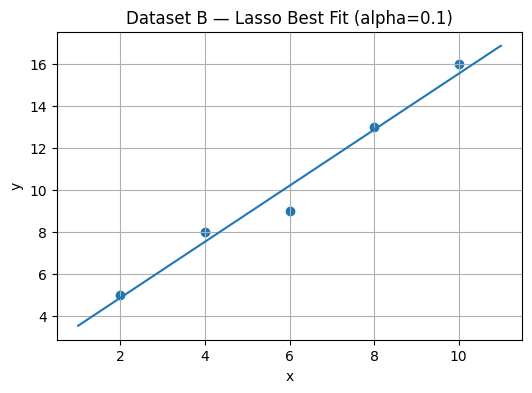

Dataset C — Lasso (alpha=0.1)
Intercept: 4.987500
Coefficient: [0.6875]
Predicted values (per point): [7.05, 8.425, 9.8, 11.175, 12.55]
MSE: 0.641250



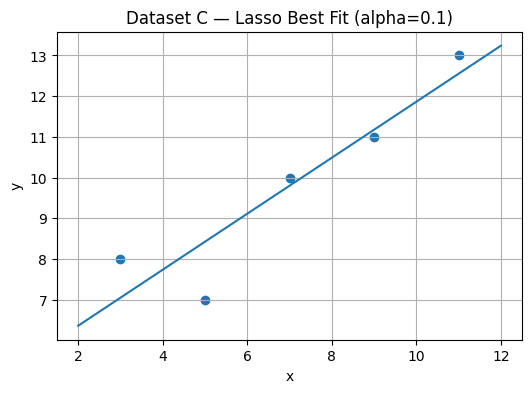

In [3]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

datasets = {
    "A": {"x": np.array([1,2,3,4,5], dtype=float), "y": np.array([2,4,5,3,6], dtype=float)},
    "B": {"x": np.array([2,4,6,8,10], dtype=float), "y": np.array([5,8,9,13,16], dtype=float)},
    "C": {"x": np.array([3,5,7,9,11], dtype=float), "y": np.array([8,7,10,11,13], dtype=float)}
}

# Choose Lasso alpha (regularization strength). Try 0.01, 0.1, 1.0
lasso_alpha = 0.1
max_iter = 10000

for name, data in datasets.items():
    x = data["x"].reshape(-1,1)
    y = data["y"].reshape(-1,1)

    model = Lasso(alpha=lasso_alpha, fit_intercept=True, max_iter=max_iter)
    model.fit(x, y.ravel())

    intercept = model.intercept_
    coef = model.coef_
    y_pred = model.predict(x).reshape(-1,1)
    mse = mean_squared_error(y, y_pred)

    print("="*60)
    print(f"Dataset {name} — Lasso (alpha={lasso_alpha})")
    print(f"Intercept: {intercept:.6f}")
    print(f"Coefficient: {coef.tolist()}")
    print(f"Predicted values (per point): {np.round(y_pred.flatten(),6).tolist()}")
    print(f"MSE: {mse:.6f}")
    print("="*60, "\n")

    # Plot best-fit (line using learned intercept & coef)
    plt.figure(figsize=(6,4))
    plt.scatter(x.flatten(), y.flatten())
    x_line = np.linspace(x.min()-1, x.max()+1, 200)
    y_line = intercept + coef[0] * x_line
    plt.plot(x_line, y_line)
    plt.title(f"Dataset {name} — Lasso Best Fit (alpha={lasso_alpha})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()
